# Image scaling using cuda
This notebooks is aimed to be run in Google Colaboratory

## Dependencies installation

In [ ]:
!apt-get install gcc-5 g++-5 -y -qq;
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc;
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++;
!pip install git+git://github.com/andreinechaev/nvcc4jupyter.git
%load_ext nvcc_plugin

ln: failed to create symbolic link '/usr/local/cuda/bin/gcc': File exists
ln: failed to create symbolic link '/usr/local/cuda/bin/g++': File exists
  Cloning git://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-9yvd6irg
  Running command git clone -q git://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-9yvd6irg
  Created wheel for NVCCPlugin: filename=NVCCPlugin-0.0.2-cp36-none-any.whl size=4307 sha256=9decb88cc7c1a0ef2f7e96d6a9f9c23764c9b58d2f58a3f618ec1f472d6b2334
  Stored in directory: /tmp/pip-ephem-wheel-cache-wffrqvmg/wheels/10/c2/05/ca241da37bff77d60d31a9174f988109c61ba989e4d4650516
Successfully built NVCCPlugin
directory /content/src already exists
Out bin /content/result.out


In [ ]:
# Install OpenCV
! sudo apt-get update
! sudo apt-get upgrade
! sudo apt-get install build-essential cmake unzip pkg-config
! sudo apt-get install libjpeg-dev libpng-dev libtiff-dev
! sudo apt-get install libavcodec-dev libavformat-dev libswscale-dev
! sudo apt-get install libv4l-dev libxvidcore-dev libx264-dev
! sudo apt-get install libgtk-3-dev
! sudo apt-get install libatlas-base-dev gfortran
! sudo apt-get install python3-dev

%cd /content
!git clone https://github.com/opencv/opencv
!git clone https://github.com/opencv/opencv_contrib
!mkdir /content/build
%cd /content/build

!cmake -DOPENCV_EXTRA_MODULES_PATH=/content/opencv_contrib/modules  -DBUILD_SHARED_LIBS=OFF -DBUILD_TESTS=OFF -DBUILD_PERF_TESTS=OFF -DBUILD_EXAMPLES=OFF -DWITH_OPENEXR=OFF -DWITH_CUDA=ON -DWITH_CUBLAS=ON -DWITH_CUDNN=ON -DOPENCV_DNN_CUDA=ON /content/opencv
!make -j`nproc`
!sudo make install

## Device query

In [ ]:
# !nvidia-smi
%cd /usr/local/cuda-10.1/samples/1_Utilities/deviceQuery/
!make
!./deviceQuery

/usr/local/cuda-10.1/samples/1_Utilities/deviceQuery
make: Nothing to be done for 'all'.
./deviceQuery Starting...

 CUDA Device Query (Runtime API) version (CUDART static linking)

Detected 1 CUDA Capable device(s)

Device 0: "Tesla T4"
  CUDA Driver Version / Runtime Version          10.1 / 10.1
  CUDA Capability Major/Minor version number:    7.5
  Total amount of global memory:                 15080 MBytes (15812263936 bytes)
  (40) Multiprocessors, ( 64) CUDA Cores/MP:     2560 CUDA Cores
  GPU Max Clock rate:                            1590 MHz (1.59 GHz)
  Memory Clock rate:                             5001 Mhz
  Memory Bus Width:                              256-bit
  L2 Cache Size:                                 4194304 bytes
  Maximum Texture Dimension Size (x,y,z)         1D=(131072), 2D=(131072, 65536), 3D=(16384, 16384, 16384)
  Maximum Layered 1D Texture Size, (num) layers  1D=(32768), 2048 layers
  Maximum Layered 2D Texture Size, (num) layers  2D=(32768, 32768), 2048 l

## Download code and build it

In [117]:
%cd /content
!git clone https://github.com/crdgonzalezca/parallel_computing.git
%cd /content/parallel_computing
!git checkout cuda

/content
fatal: destination path 'parallel_computing' already exists and is not an empty directory.
/content/parallel_computing
Already on 'cuda'
Your branch is up to date with 'origin/cuda'.


In [122]:
%cd /content/parallel_computing/cuda
!git pull origin cuda
!make

/content/parallel_computing/cuda
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 4 (delta 2), reused 4 (delta 2), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/crdgonzalezca/parallel_computing
 * branch            cuda       -> FETCH_HEAD
   0993bb6..989f603  cuda       -> origin/cuda
Updating 0993bb6..989f603
Fast-forward
 cuda/image_scaling.cu | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)
/usr/local/cuda-10.1/bin/nvcc -ccbin g++ -I/usr/local/cuda/samples/common/inc  -m64    -gencode arch=compute_30,code=sm_30 -gencode arch=compute_35,code=sm_35 -gencode arch=compute_37,code=sm_37 -gencode arch=compute_50,code=sm_50 -gencode arch=compute_52,code=sm_52 -gencode arch=compute_60,code=sm_60 -gencode arch=compute_61,code=sm_61 -gencode arch=compute_70,code=sm_70 -gencode arch=compute_75,code=sm_75 -gencode arch=compute_75,code=compute_75 -o image_scaling.o -c 

In [123]:
%cd /content/parallel_computing/cuda
!./image_scaling ../images/image3_720p.jpg ../images/result_480p.jpg 16 Bilinear

/content/parallel_computing/cuda
Performance= 12246.06 GFlop/s, Time= 0.00016933 s, Size= 2073600 Ops, WorkgroupSize= 256 threads/block, Blocks= 1350
Done


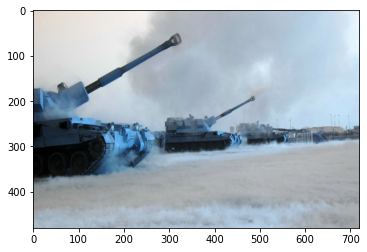

In [124]:
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

image = cv2.imread('/content/parallel_computing/images/result_480p.jpg')
plt.imshow(image)
plt.show()